In [1]:
%load_ext autoreload
%autoreload 2
import sys

sys.path.append("../")
from functions import *

%matplotlib widget

In [5]:
bines = 1000
edges = np.linspace(0, 1, bines+1)
bin_width = edges[1] - edges[0]
container = np.zeros(bines)

N = manage_n_samples(1e9,max_batch_size=1e8)
print(N)
distances = []

original = np.array([1] * bines)



[    1000     2162     6838    21622    68378   216227   683773  2162277
  6837723 21622776 68377224]


In [3]:
for i, n in enumerate(N):
    print(N[:i+1].sum())
    container += np.histogram(np.random.rand(n), bins=edges)[0]
    container_normalized = container / container.sum() / bin_width
    distances.append(sum(rel_entr(original, container_normalized)))

1000
3162
10000
31622
100000
316227
1000000
3162277
10000000
31622776
100000000
200000000
300000000
400000000
500000000
600000000
700000000
800000000
900000000
1000000000


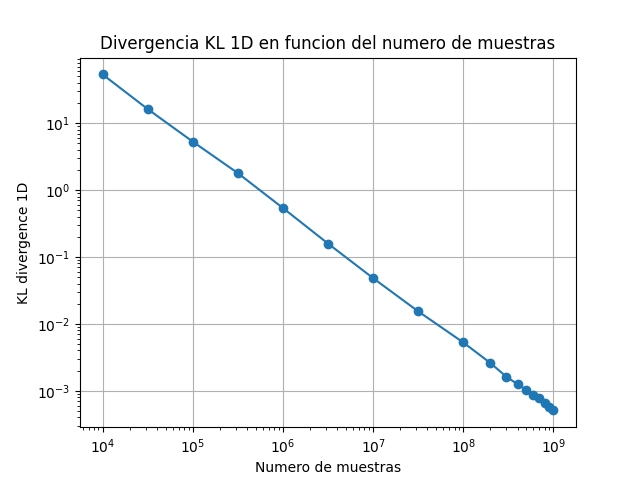

In [4]:
N_plot = [sum(N[: i + 1]) for i, _ in enumerate(N)]

plt.plot(N_plot, distances, marker="o")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Numero de muestras")
plt.ylabel("KL divergence 1D")
plt.grid()
plt.title("Divergencia KL 1D en funcion del numero de muestras")
plt.show()

20
128
237
346
455
564
673
782
891
1000


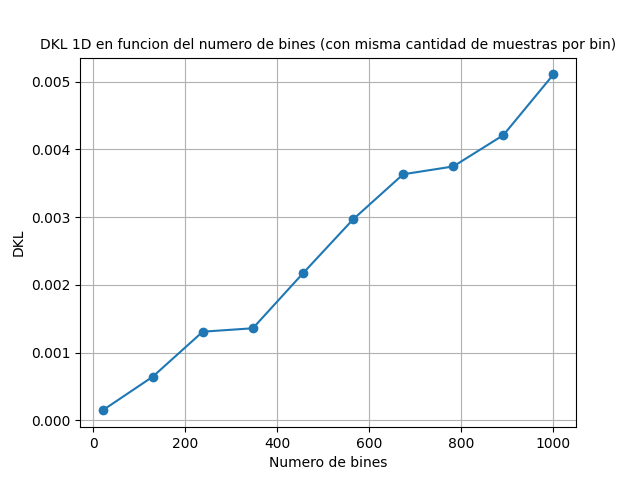

In [6]:
def prueba(cantidad_bines: int) -> float:
    edges = np.linspace(0, 1, cantidad_bines + 1)
    bin_width = edges[1] - edges[0]
    sintetico = np.histogram(np.random.rand(int(1e5 * i)), bins=edges)[0]
    sintetico = sintetico / sintetico.sum() / bin_width
    original = np.array([1] * cantidad_bines)
    return sum(rel_entr(original, sintetico)) / len(original)


minima_distancia = []
for i in np.linspace(20, 1000, 10):
    print(int(i))
    minima_distancia.append(prueba(int(i)))

plt.figure()
plt.plot(np.linspace(20, 1000, 10), minima_distancia, marker="o")
plt.xlabel("Numero de bines")
plt.ylabel("DKL")
plt.grid()
plt.title(
    "DKL 1D en funcion del numero de bines (con misma cantidad de muestras por bin)",
    fontsize=10,
)
plt.show()